<a href="https://colab.research.google.com/github/shekhar-banerjee96/Stock-Analysis/blob/master/LSTM_Stock_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NIFTY50_all.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  object        
 2   Series              235192 non-null  object        
 3   Prev Close          235192 non-null  float64       
 4   Open                235192 non-null  float64       
 5   High                235192 non-null  float64       
 6   Low                 235192 non-null  float64       
 7   Last                235192 non-null  float64       
 8   Close               235192 non-null  float64       
 9   VWAP                235192 non-null  float64       
 10  Volume              235192 non-null  int64         
 11  Turnover            235192 non-null  float64       
 12  Trades              120344 non-null  float64       
 13  Deliverable Volume  219115 no

In [6]:
df['Symbol'].nunique()

65

In [7]:
df['Symbol'].value_counts()

Symbol
IOC           5306
CIPLA         5306
M&M           5306
ICICIBANK     5306
ONGC          5306
              ... 
MUNDRAPORT    1023
TELCO          999
KOTAKMAH       502
SSLT           388
JSWSTL         123
Name: count, Length: 65, dtype: int64

In [8]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
df = df[['Date','Symbol','Open', 'High', 'Low', 'Close', 'VWAP', 'Volume']]
df.head()

,Date,Symbol,Open,High,Low,Close,VWAP,Volume
0,2007-11-27,MUNDRAPORT,770.00,1050.00,770.0,962.90,984.72,27294366
1,2007-11-28,MUNDRAPORT,984.00,990.00,874.0,893.90,941.38,4581338
2,2007-11-29,MUNDRAPORT,909.00,914.75,841.0,884.20,888.09,5124121
3,2007-11-30,MUNDRAPORT,890.00,958.00,890.0,921.55,929.17,4609762
4,2007-12-03,MUNDRAPORT,939.75,995.00,922.0,969.30,965.65,2977470


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
VWAP      0
Volume    0
dtype: int64

In [12]:
# To check Autocorrelation - Durbin Watson Test
import statsmodels.api as sm
sm.stats.durbin_watson(df['VWAP'])

0.0014277598023373546

In [14]:
sm.stats.durbin_watson(df['Volume'])

-1.6285414945629082

Volume has -ve correlation.
It as value dips in recent time and a huge difference was seen

In [13]:
df['Time_Steps'] = df['Date']

In [16]:
df.set_index('Time_Steps', inplace=True)

In [17]:
df.head()

,Date,Symbol,Open,High,Low,Close,VWAP,Volume
Time_Steps,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,770.00,1050.00,770.0,962.90,984.72,27294366
2007-11-28,2007-11-28,MUNDRAPORT,984.00,990.00,874.0,893.90,941.38,4581338
2007-11-29,2007-11-29,MUNDRAPORT,909.00,914.75,841.0,884.20,888.09,5124121
2007-11-30,2007-11-30,MUNDRAPORT,890.00,958.00,890.0,921.55,929.17,4609762
2007-12-03,2007-12-03,MUNDRAPORT,939.75,995.00,922.0,969.30,965.65,2977470


In [18]:
df = df[df['Symbol'] == 'SUNPHARMA']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5306 non-null   datetime64[ns]
 1   Symbol  5306 non-null   object        
 2   Open    5306 non-null   float64       
 3   High    5306 non-null   float64       
 4   Low     5306 non-null   float64       
 5   Close   5306 non-null   float64       
 6   VWAP    5306 non-null   float64       
 7   Volume  5306 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 373.1+ KB


In [21]:
df.drop('Symbol',axis=1,inplace=True)

In [22]:
df.head()

,Date,Open,High,Low,Close,VWAP,Volume
Time_Steps,,,,,,,
2000-01-03,2000-01-03,1800.0,1835.05,1760.0,1835.05,1825.90,3024
2000-01-04,2000-01-04,1960.0,1960.00,1763.0,1810.45,1805.97,5787
2000-01-05,2000-01-05,1845.0,1845.00,1740.0,1746.90,1766.69,6105
2000-01-06,2000-01-06,1750.0,1795.00,1735.0,1745.20,1749.32,3472
2000-01-07,2000-01-07,1705.0,1705.00,1605.6,1605.60,1621.51,4125


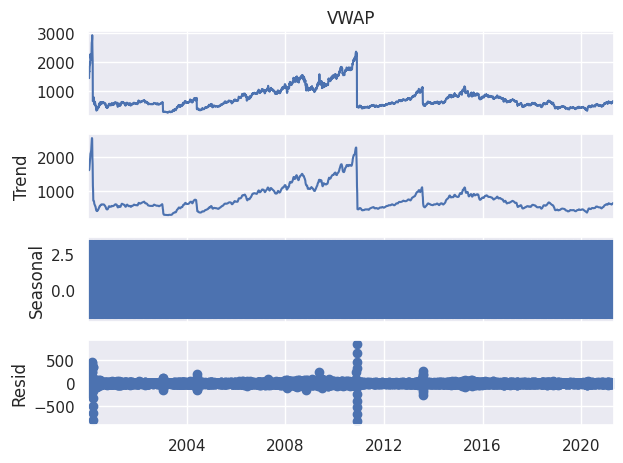

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['VWAP'], period=12)
decompose.plot()
plt.show()

# Building LSTM Model

In [26]:
train = df.loc[df['Date'] < '2017-04-12']

In [27]:
train.shape

(4303, 7)

In [28]:
test = df[df['Date'] >= '2017-04-12']
test.shape

(1003, 7)

In [29]:
train_x = train.drop(['Date','VWAP'], axis=1)
train_y = train['VWAP']

test_x = test.drop(['Date','VWAP'], axis=1)
test_y = test['VWAP']

In [30]:
train_y.head()

Time_Steps
2000-01-03    1825.90
2000-01-04    1805.97
2000-01-05    1766.69
2000-01-06    1749.32
2000-01-07    1621.51
Name: VWAP, dtype: float64

In [31]:
train_x.head()

,Open,High,Low,Close,Volume
Time_Steps,,,,,
2000-01-03,1800.0,1835.05,1760.0,1835.05,3024
2000-01-04,1960.0,1960.00,1763.0,1810.45,5787
2000-01-05,1845.0,1845.00,1740.0,1746.90,6105
2000-01-06,1750.0,1795.00,1735.0,1745.20,3472
2000-01-07,1705.0,1705.00,1605.6,1605.60,4125


In [32]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_train_x = scaler.fit_transform(train_x)
sc_test_x = scaler.fit_transform(test_x)

In [33]:
sc_train_x = pd.DataFrame(sc_train_x, columns=train_x.columns)
sc_test_x = pd.DataFrame(sc_test_x, columns=test_x.columns)

In [34]:
sc_train_x

,Open,High,Low,Close,Volume
0,0.566261,0.550865,0.629026,0.600724,0.000010
1,0.625323,0.594986,0.630280,0.591298,0.000021
2,0.582872,0.554379,0.620661,0.566945,0.000022
3,0.547804,0.536723,0.618570,0.566294,0.000012
4,0.531192,0.504944,0.564450,0.512799,0.000015
...,...,...,...,...,...
4298,0.158176,0.148905,0.180050,0.162209,0.007441
4299,0.157604,0.147581,0.178649,0.160753,0.007584
4300,0.154633,0.144739,0.169887,0.152725,0.022869
4301,0.148025,0.139442,0.169469,0.153414,0.008048


In [35]:
# splitting dataset into training and test
training_size = int(len(sc_train_x)*0.75)
test_size = len(sc_train_x) - training_size

In [36]:
# splitting dataset into training and test
training_size = int(len(sc_train_x)*0.75)
test_size = len(sc_train_x) - training_size

In [38]:
train1 = train.drop(['Date'], axis=1)

In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [40]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_sequred_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(sc_train_x, train_y, epochs=100, batch_size=64, verbose=1, validation_data=(sc_test_x, test_y) )